# Question 1


## Importing the data and required libraries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('complaint.csv')
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Imposed a New Usage Cap of 300GB that punishe...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


## Analysis Tasks

### Task 1 - Produce the trend chart about the monthly registered complaints

**First, I extract the month using the `DatetimeIndex().month` value and store it in another column.**  

**Then I group by the month, find each month's number of complaints using `size`, then plot a line chart.**

In [ ]:
data['Month'] = pd.DatetimeIndex(data['Date_month_year']).month #Getting months from the Date_month_year col as numbers
data.head() #New column, 'Month' added

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,Imposed a New Usage Cap of 300GB that punishe...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7
4,307175,not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5


In [ ]:
frequencies = data.groupby(['Month']).size() #groupby the month & get frequencies of each
monthly_complaints = pd.DataFrame() 
monthly_complaints['Frequencies'] = frequencies #store the frequencies in this a dataframe
months_in_letters = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] #months in letters
monthly_complaints['Month'] = months_in_letters #Added lettered month col
monthly_complaints

,Frequencies,Month
Month,,
1,52,Jan
2,54,Feb
3,42,Mar
4,351,Apr
5,297,May
6,984,Jun
7,44,Jul
8,61,Aug
9,51,Sep


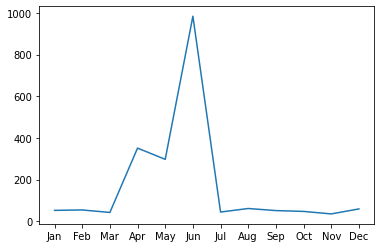

<Figure size 720x360 with 0 Axes>

In [ ]:
# monthly_complaints.plot(kind='line', figsize=(10,5))  #For a bigger plot, but without letters
plt.plot(months_in_letters,frequencies)
plt.figure(figsize=(10,5))
plt.show()

### Task 2 - Generate a tabular output with frequencies of complaints

**To do this task, I've used the `value_counts()` method on `Customer Complaint` column.**  
**To print all, we can chain it with the `to_dict()` method or set `display.max_columns` and `display.max_rows` to `None`.**

In [ ]:
table1 = pd.DataFrame()
table1['Frequencies'] = data['Customer Complaint'].value_counts() #If frequencies are per complaint ty
table1
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  #Print All method1
#     print(table1)
#data['Customer Complaint'].value_counts().to_dict() #Print all method2

,Frequencies
Internet,18
Data Cap,17
data cap,12
Billing,11
Data Caps,11
...,...
"slow routing, dropped packets",1
Internet problems,1
Billing practices,1
has turned my business account to third-party collections when I legitimately canceled my contract per the terms,1


In [ ]:
# from difflib import SequenceMatcher

# def similar(a, b):
#     threshold = 0.8
#     return (SequenceMatcher(None, a, b).ratio() > threshold)

# pd.merge(table1['Frequencies'],table1)

**If the frequencies are per month, then I've just used `value_counts` on `Month` column.**

In [ ]:
pd.Series(data['Month'].value_counts())

6     984
4     351
5     297
8      61
12     59
2      54
1      52
9      51
10     47
7      44
3      42
11     35
Name: Month, dtype: int64

### Task 3 - Find which complaint types are maximum i.e., internet, network issues, etc.

**After getting the frequencies using `value_counts()`, I've chained it with the `head()` method to get the first few values, i.e. complaints with maximum frequencies.**

In [ ]:
#The following are the max complaints, using head here
print("Maximum complaint types and their frequencies:")
pd.DataFrame(data['Customer Complaint'].value_counts().head())

Maximum complaint types and their frequencies:


,Customer Complaint
Internet,18
Data Cap,17
data cap,12
Billing,11
Data Caps,11


### Task 4 - Provide the state wise status of complaint in the form of stacked bar

**To do this, I've refered to [this](https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart) stackoverflow answer.**

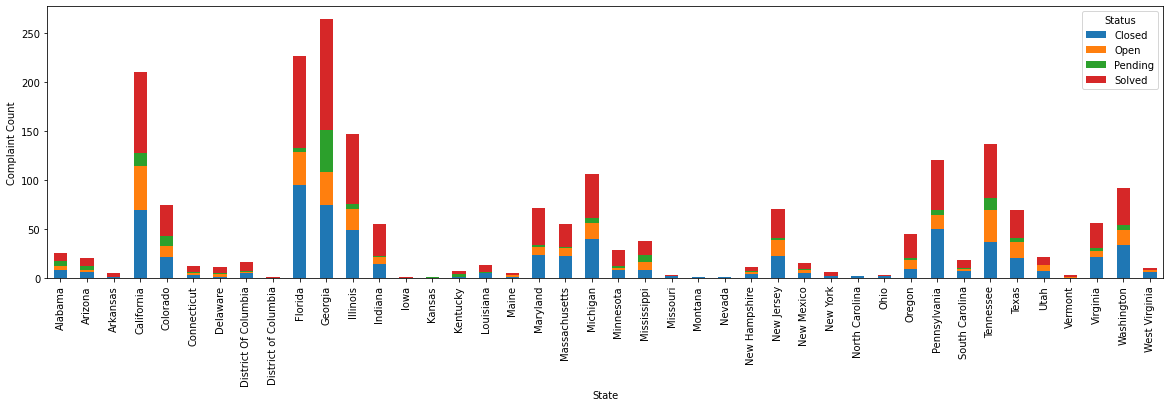

In [ ]:
import matplotlib.pyplot as plt
state_wise = data.groupby(['State','Status']).size().unstack().fillna(0) #storing state wise complaints
state_wise.plot(kind='bar',stacked=True, figsize=(20,5)) #Plotting the graph of State wise complaints
plt.ylabel('Complaint Count')
plt.xlabel('State')
# plt.figure(figsize=(100,100))
plt.show()

### Task 5 - Report which state has registered maximum and minimum complaint

**I store the state wise frequencies in a dataframe, and then find `max()` and `min()` valued columns.**  
**We can also use the idxmax and idxmin methods, as found in [this](https://stackoverflow.com/questions/15138973/how-to-get-the-number-of-the-most-frequent-value-in-a-column) stackoverflow answer, but it only gave me the one value.**

In [ ]:
state_frequencies = pd.DataFrame(data['State'].value_counts()) #Store frequencies
state_frequencies.head()


,State
Georgia,264
Florida,226
California,210
Illinois,147
Tennessee,137


In [ ]:
print("States where maximum complaints are registered:\n")

state_frequencies[state_frequencies['State'] == state_frequencies['State'].max()] #Max complaints

States where maximum complaints are registered:



,State
Georgia,264


In [ ]:
print("States where minimum complaints are registered:\n")

state_frequencies[state_frequencies['State'] == state_frequencies['State'].min()] #Min complaints

States where minimum complaints are registered:



,State
Kansas,1
District of Columbia,1
Nevada,1
Montana,1
Iowa,1


In [ ]:
#Alternate
print("State with Maximum Complaints:", data['State'].value_counts().idxmax())
print("State with Minimum Complaints:", data['State'].value_counts().idxmin())

State with Maximum Complaints: Georgia
State with Minimum Complaints: Kansas


### Task 6 - Which state has the highest and lowest percentage of unresolved complaints

**Here, I reuse the `state_wise` dataframe. I sum the total complaints per state, then find the percentages of the unresolved complaints.**


In [ ]:
state_wise.head() #Initial state wise dataframe

Status,Closed,Open,Pending,Solved
State,,,,
Alabama,8.0,4.0,5.0,9.0
Arizona,6.0,2.0,4.0,8.0
Arkansas,1.0,0.0,0.0,4.0
California,69.0,45.0,14.0,82.0
Colorado,21.0,12.0,10.0,32.0


In [ ]:
state_wise['Total Complaints'] = state_wise.iloc[:,0:].sum(axis=1) #Getting total complaints as sum of all types
state_wise['Resolved Percentage'] = ((state_wise['Closed'] + state_wise['Solved'])/state_wise['Total Complaints']) * 100 #resolved complaints
state_wise['Unresolved Percentage'] = ((state_wise['Open'] + state_wise['Pending'])/state_wise['Total Complaints']) * 100 #Unresolved complaints
state_wise.head() #Modified dataframe

Status,Closed,Open,Pending,Solved,Total Complaints,Resolved Percentage,Unresolved Percentage
State,,,,,,,
Alabama,8.0,4.0,5.0,9.0,152.0,11.184211,5.921053
Arizona,6.0,2.0,4.0,8.0,140.0,10.000000,4.285714
Arkansas,1.0,0.0,0.0,4.0,110.0,4.545455,0.000000
California,69.0,45.0,14.0,82.0,520.0,29.038462,11.346154
Colorado,21.0,12.0,10.0,32.0,250.0,21.200000,8.800000


**Now that I've added the percentages, we can find the highest(`max`) and lowest(`min`) unresolved percentages.**

In [ ]:
state_wise[state_wise['Unresolved Percentage'] == state_wise['Unresolved Percentage'].max()]

Status,Closed,Open,Pending,Solved,Total Complaints,Resolved Percentage,Unresolved Percentage
State,,,,,,,
Kansas,0.0,0.0,1.0,0.0,1.0,0.0,100.0


In [ ]:
state_wise[state_wise['Unresolved Percentage'] == state_wise['Unresolved Percentage'].min()]

Status,Closed,Open,Pending,Solved,Total Complaints,Resolved Percentage,Unresolved Percentage
State,,,,,,,
Arkansas,1.0,0.0,0.0,4.0,5.0,100.0,0.0
District of Columbia,0.0,0.0,0.0,1.0,1.0,100.0,0.0
Iowa,0.0,0.0,0.0,1.0,1.0,100.0,0.0
Missouri,2.0,0.0,0.0,1.0,3.0,100.0,0.0
Montana,1.0,0.0,0.0,0.0,1.0,100.0,0.0
Nevada,1.0,0.0,0.0,0.0,1.0,100.0,0.0
New York,2.0,0.0,0.0,4.0,6.0,100.0,0.0
North Carolina,2.0,0.0,0.0,0.0,2.0,100.0,0.0
Ohio,2.0,0.0,0.0,1.0,3.0,100.0,0.0


# Question 2

## Importing the data and required libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
data = pd.read_csv('Mart.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Basic Statistical Tasks

### Task 1 - Which store has maximum sales?


**To do this, I get the store wise sales, then find the store corresponding to max value.**

In [ ]:
store_sales = pd.DataFrame(data.groupby(['Store'])['Weekly_Sales'].sum())
print("Store with maximum sales:\n")
store_sales[store_sales['Weekly_Sales'] == store_sales['Weekly_Sales'].max()]

Store with maximum sales:



,Weekly_Sales
Store,
20,3.013978e+08


### Task 2 - Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation.

**To do this, I use the `std()` and `mean()` methods on `DataFrame`.**  
**For the coefficent, just divide the values.**

In [ ]:
store_deviation = data.groupby('Store').std()   #groupby the Store, then standard deviation
store_deviation.head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
1,155980.767761,0.255926,14.250486,0.427313,4.350890,0.383749
2,237683.694682,0.255926,15.492766,0.427313,4.342286,0.615414
3,46319.631557,0.255926,12.645851,0.427313,4.434232,0.447245
4,266201.442297,0.255926,16.180023,0.416967,1.858300,1.421267
5,37737.965745,0.255926,14.225352,0.427313,4.364848,0.387415


In [ ]:
store_deviation[store_deviation['Weekly_Sales'] == store_deviation['Weekly_Sales'].max()]  #Max Deviation in Sales

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
14,317569.949476,0.255926,16.271612,0.443029,3.59482,0.15146


In [ ]:
store_mean = data.groupby('Store').mean()     #Similar to standard deviation, here we get the mean
store_mean.head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
1,1.555264e+06,0.06993,68.306783,3.219699,215.996892,7.610420
2,1.925751e+06,0.06993,68.216364,3.219699,215.646311,7.623846
3,4.027044e+05,0.06993,71.434196,3.219699,219.391531,7.176986
4,2.094713e+06,0.06993,62.253357,3.216972,128.679669,5.964692
5,3.180118e+05,0.06993,69.410140,3.219699,216.565581,6.295406


In [ ]:
coefficients = pd.DataFrame()
coefficients['Store_wise_coefficient'] = store_deviation['Weekly_Sales']/store_mean['Weekly_Sales']
coefficients.head()
# coefficients[store_deviation['Weekly_Sales']==store_deviation['Weekly_Sales'].max()]    #To get store 14's coefficient

,Store_wise_coefficient
Store,
1,0.100292
2,0.123424
3,0.115021
4,0.127083
5,0.118668


### Task 3 - Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

1. **To do this, I find mean of weekly sales of non-holiday weeks, i.e., `Holiday_Flag` set to `0`.**  
2. **Then I lookup the main DataFrame to find holiday weeks and sales are greater than this mean.**  
3. **Finally, I print the unique date values from such weeks, to get the holidays which have higher sales than the mean of non-holiday weeks.**

In [ ]:
mean_sales_not_holiday = data[data.Holiday_Flag==0]['Weekly_Sales'].mean()    #Mean sales on non Holiday weeks
print("Mean of weekly sales on non holiday weeks: ", mean_sales_not_holiday)

Mean of weekly sales on non holiday weeks:  1041256.3802088564


In [ ]:
holidays_higher_sales = data[(data.Holiday_Flag==1) & (data.Weekly_Sales>mean_sales_not_holiday)]
#Weekly Sales of Holiday weeks that are greater than mean of non holiday weeks sales
holidays_higher_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742


In [ ]:
holidays_higher_sales_dates = pd.DataFrame()
holidays_higher_sales_dates['Holiday Dates with high sales'] = holidays_higher_sales.Date.unique()
holidays_higher_sales_dates

,Holiday Dates with high sales
0,12-02-2010
1,10-09-2010
2,26-11-2010
3,31-12-2010
4,11-02-2011
5,09-09-2011
6,25-11-2011
7,30-12-2011
8,10-02-2012
9,07-09-2012


### Task 4 - Stacked bar graph of year wise sales plotted on Month vs Sales

**To do this, I've converted `Date` column to date time, extracted the `Month` and `Year`, then grouped the data by these two columns for the sum of sales.**  
**Then, I've plotted the stacked bar graph.**

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])           #To datetime
data['Month'] = pd.DatetimeIndex(data['Date']).month  #Extract Month
data['Year'] = pd.DatetimeIndex(data['Date']).year    #Extract Year
monthly = data.groupby(['Month','Year'])['Weekly_Sales'].sum().unstack().fillna(0) 
#Group by these two columns, fill with the sum of sales
print("Monthly sales for all the years:\n")
monthly

Monthly sales for all the years:



Year,2010,2011,2012
Month,,,
1,4.223988e+07,2.119657e+08,1.722207e+08
2,1.915869e+08,1.876092e+08,1.428296e+08
3,1.862262e+08,1.365205e+08,2.307397e+08
4,1.838118e+08,2.789693e+08,1.825428e+08
5,2.806119e+08,1.828017e+08,1.422830e+08
6,1.424361e+08,1.401936e+08,2.923883e+08
7,1.842664e+08,2.244611e+08,1.845865e+08
8,1.845381e+08,1.880810e+08,1.916126e+08
9,1.797041e+08,2.310323e+08,1.797959e+08


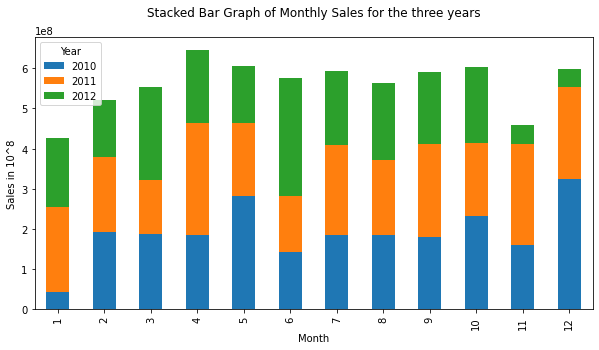

In [ ]:
monthly.plot(kind='bar',stacked=True,figsize=(10,5))    #Plotting the bar graph
plt.xlabel('Month')
plt.ylabel('Sales in 10^8')
plt.title('Stacked Bar Graph of Monthly Sales for the three years\n')
plt.show()

## Statistical Model

* **To do this question, and sort the dates and index them from 0 onwards.**  
* **Then I train a linear regression model, based on the Date.**  
* **After plotting some graphs between the different features and the Sales, I notice that these features do impact the sales.**
* **So finally, I train a multi-variable linear regression model, with the other features like CPI along with the Date.**
* **I extract the individual coefficients of each, and plot a graph to show their impacts on the model.**

### Extracting Store-2 Data

In [ ]:
store2_data = data[data['Store']==2]
store2_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
143,2,2010-05-02,2136989.46,0,40.19,2.572,210.752605,8.324,5,2010
144,2,2010-12-02,2137809.50,1,38.49,2.548,210.897994,8.324,12,2010
145,2,2010-02-19,2124451.54,0,39.69,2.514,210.945160,8.324,2,2010
146,2,2010-02-26,1865097.27,0,46.10,2.561,210.975957,8.324,2,2010
147,2,2010-05-03,1991013.13,0,47.17,2.625,211.006754,8.324,5,2010


### Simple Linear Regression Model

Convert the Dates to indices.

In [ ]:
# store2_data.shape
# store2_data.index
store2_data['Date Indices'] = store2_data.index - store2_data.shape[0]
store2_data.head(n=20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Date Indices
143,2,2010-05-02,2136989.46,0,40.19,2.572,210.752605,8.324,5,2010,0
144,2,2010-12-02,2137809.50,1,38.49,2.548,210.897994,8.324,12,2010,1
145,2,2010-02-19,2124451.54,0,39.69,2.514,210.945160,8.324,2,2010,2
146,2,2010-02-26,1865097.27,0,46.10,2.561,210.975957,8.324,2,2010,3
147,2,2010-05-03,1991013.13,0,47.17,2.625,211.006754,8.324,5,2010,4
148,2,2010-12-03,1990483.78,0,57.56,2.667,211.037551,8.324,12,2010,5
149,2,2010-03-19,1946070.88,0,54.52,2.720,210.873332,8.324,3,2010,6
150,2,2010-03-26,1750197.81,0,51.26,2.732,210.676610,8.324,3,2010,7
151,2,2010-02-04,2066187.72,0,63.27,2.719,210.479887,8.200,2,2010,8
152,2,2010-09-04,1954689.21,0,65.41,2.770,210.283165,8.200,9,2010,9


Split the data into train and test, then train the model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X = store2_data[['Date Indices']]
y = store2_data[['Weekly_Sales']]
#Split the data into train = 90%, test = 10%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state = 42 )

simple_model = linear_model.LinearRegression()
simple_model.fit(X_train,y_train)
print("The model has been trained.")
print("The intercept is:", simple_model.intercept_, "and the coefficients are:", simple_model.coef_)

The model has been trained.
The intercept is: [1960133.62504624] and the coefficients are: [[-547.70350259]]


In [ ]:
y_pred = simple_model.predict(X_test)   #Predictions on test values
y_pred

array([[1896052.31524298],
       [1949727.25849699],
       [1915221.9378337 ],
       [1907006.38529482],
       [1929462.22890109],
       [1953561.18301514],
       [1888384.46620669],
       [1924532.89737776],
       [1923985.19387517],
       [1950274.96199958],
       [1932200.74641405],
       [1917412.75184406],
       [1908649.49580259],
       [1887836.7627041 ],
       [1905363.27478704]])

In [ ]:
simple_model.score(X_test,y_test)   #Score of classifier

-0.06726219423951574

### Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

**Let us plot the corresponding Variable vs Sales graphs to find out.**

First, the graph of `CPI` vs `Weekly_Sales`.

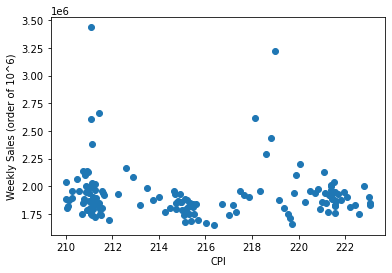

In [ ]:
plt.scatter(store2_data['CPI'], store2_data['Weekly_Sales'])
plt.xlabel('CPI')
plt.ylabel('Weekly Sales (order of 10^6)')
plt.show()

Then, the graph of `Unemployment` vs `Weekly_Sales`

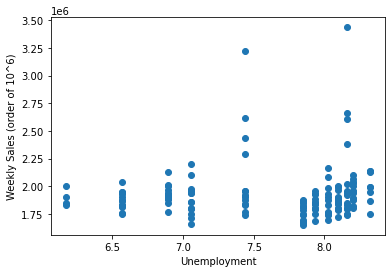

In [ ]:
plt.scatter(store2_data['Unemployment'], store2_data['Weekly_Sales'])
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales (order of 10^6)')
plt.show()

Finally, the graph of `Fuel_Price` vs `Weekly_Sales`.

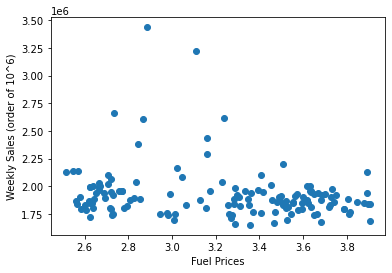

In [ ]:
plt.scatter(store2_data['Fuel_Price'], store2_data['Weekly_Sales'])
plt.xlabel('Fuel Prices')
plt.ylabel('Weekly Sales (order of 10^6)')
plt.show()

Let's also check for Temperature and Holidays.

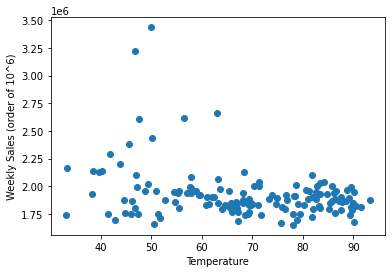

In [ ]:
plt.scatter(store2_data['Temperature'], store2_data['Weekly_Sales'])
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales (order of 10^6)')
plt.show()

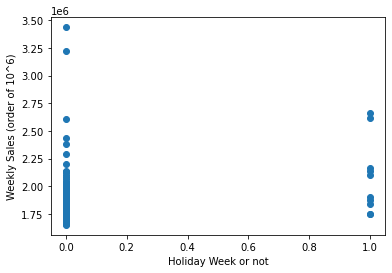

In [ ]:
plt.scatter(store2_data['Holiday_Flag'], store2_data['Weekly_Sales'])
plt.xlabel('Holiday Week or not')
plt.ylabel('Weekly Sales (order of 10^6)')
plt.show()

* **From the graphs, it is quite clear that `CPI`, `Fuel_Prices`, `Temperature` impact the Sales.**  
* **`Unemplyment`, on the other hand, doesn't seem to impact Sales.**
* **`Holiday_Week` being a binary value, won't scatter much.**



### Multi-Variable Linear Regression Model

**Let us plot a multivariable regression model.  
The above mentioned variables will be used as features for the model. Since the values are varying across a large scale, we normalise them first.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

normalised_store2 = store2_data.drop(['Date','Month','Year'],axis=1)
normalised_store2 = pd.DataFrame(MinMaxScaler().fit_transform(normalised_store2),columns=normalised_store2.columns)
# normalised_store2
variables = ['Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','Date Indices']

X = normalised_store2[variables]
y = normalised_store2 ['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state = 42 )

multivar_model = linear_model.LinearRegression()
multivar_model.fit(X_train,y_train)
print("The model has been trained.")
print("Score of Model is:",multivar_model.score(X_test,y_test))

The model has been trained.
Score of Model is: 0.15234951079516879


In [ ]:
y_pred = multivar_model.predict(X_test)   #Predictions on test values
y_pred

array([0.10147451, 0.12834684, 0.09343793, 0.23539127, 0.16480436,
       0.14042667, 0.10061966, 0.09693347, 0.06946697, 0.12888754,
       0.21809148, 0.06020325, 0.22065701, 0.101914  , 0.2214479 ])

In [ ]:
print("The intercept is:", multivar_model.intercept_)
coefficients = pd.DataFrame()
coefficients['Features'] = variables
coefficients['Coefficents'] = multivar_model.coef_
coefficients

The intercept is: 0.08282226716676368


,Features,Coefficents
0,Holiday_Flag,0.016333
1,Temperature,-0.139927
2,Fuel_Price,-0.165927
3,CPI,0.061614
4,Unemployment,0.160649
5,Date Indices,0.194308


Let's plot the coefficients on a graph to visualise each features' impact.

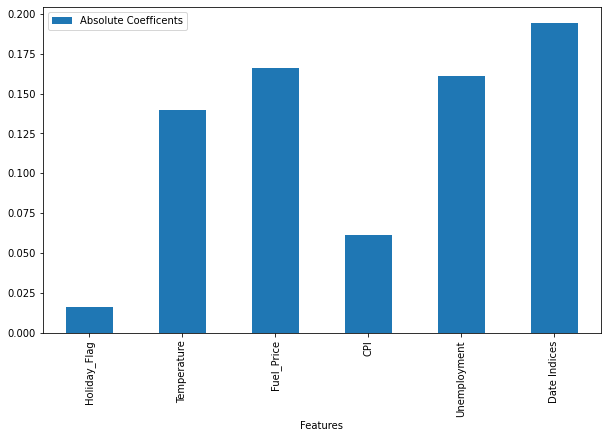

In [ ]:
coefficients['Absolute Coefficents'] = coefficients['Coefficents'].abs()
coefficients.plot(kind='bar',x='Features',y='Absolute Coefficents',figsize=(10,6))

**From this graph, we see that all features do infact impact the sales. The higher the bar in the graph, the higher the weight in the model.**